In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
species = pd.read_csv('species_info.csv')
observations = pd.read_csv('observations.csv')

In [3]:
species.head(10)

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
5,Mammal,Odocoileus virginianus,White-Tailed Deer,NaN
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",NaN
7,Mammal,Canis latrans,Coyote,Species of Concern
8,Mammal,Canis lupus,Gray Wolf,Endangered
9,Mammal,Canis rufus,Red Wolf,Endangered


In [4]:
species.category.unique()

array(['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant',
       'Nonvascular Plant'], dtype=object)

In [5]:
species.conservation_status.unique()

array([nan, 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

In [6]:
species.conservation_status.value_counts()

Species of Concern    161
Endangered             16
Threatened             10
In Recovery             4
Name: conservation_status, dtype: int64

In [7]:
species.category.value_counts()

Vascular Plant       4470
Bird                  521
Nonvascular Plant     333
Mammal                214
Fish                  127
Amphibian              80
Reptile                79
Name: category, dtype: int64

In [8]:
species[species.duplicated(subset=['scientific_name'])]

,category,scientific_name,common_names,conservation_status
3017,Mammal,Cervus elaphus,Rocky Mountain Elk,NaN
3019,Mammal,Odocoileus virginianus,"White-Tailed Deer, White-Tailed Deer",NaN
3020,Mammal,Canis lupus,"Gray Wolf, Wolf",In Recovery
3022,Mammal,Puma concolor,"Cougar, Mountain Lion, Puma",NaN
3025,Mammal,Lutra canadensis,River Otter,NaN
...,...,...,...,...
5619,Vascular Plant,Panicum rigidulum var. rigidulum,"Redtop Panicgrass, Redtop Panicum",NaN
5638,Vascular Plant,Setaria pumila,"Cattail Grass, Yellow Bristle Grass, Yellow Br...",NaN
5640,Vascular Plant,Vulpia bromoides,"Brome Fescue, Brome Six-Weeks Grass, Desert Fe...",NaN
5643,Vascular Plant,Vulpia myuros,"Foxtail Fescue, Rattail Fescue, Rat-Tail Fescu...",NaN


In [9]:
species[species.scientific_name == 'Canis lupus']

,category,scientific_name,common_names,conservation_status
8,Mammal,Canis lupus,Gray Wolf,Endangered
3020,Mammal,Canis lupus,"Gray Wolf, Wolf",In Recovery
4448,Mammal,Canis lupus,"Gray Wolf, Wolf",Endangered


In [10]:
species.drop_duplicates(subset=['scientific_name'], keep='last', inplace=True)
species.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5541 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5541 non-null   object
 1   scientific_name      5541 non-null   object
 2   common_names         5541 non-null   object
 3   conservation_status  179 non-null    object
dtypes: object(4)
memory usage: 216.4+ KB


In [11]:
observations.head(10)

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
5,Elymus virginicus var. virginicus,Yosemite National Park,112
6,Spizella pusilla,Yellowstone National Park,228
7,Elymus multisetus,Great Smoky Mountains National Park,39
8,Lysimachia quadrifolia,Yosemite National Park,168
9,Diphyscium cumberlandianum,Yellowstone National Park,250


In [12]:
observations['park_name'].unique()

array(['Great Smoky Mountains National Park', 'Yosemite National Park',
       'Bryce National Park', 'Yellowstone National Park'], dtype=object)

In [13]:
observations['park_name'] = observations['park_name'].str.replace('National Park', '')

In [14]:
observations['park_name'].unique()

array(['Great Smoky Mountains ', 'Yosemite ', 'Bryce ', 'Yellowstone '],
      dtype=object)

In [15]:
observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


In [16]:
observations[observations.duplicated(subset=['scientific_name', 'park_name'])]

,scientific_name,park_name,observations
483,Agrostis gigantea,Yellowstone,235
490,Agrostis mertensii,Yosemite,128
945,Rumex crispus,Yellowstone,255
1213,Dianthus barbatus,Bryce,110
1259,Riparia riparia,Bryce,91
...,...,...,...
23258,Microtus longicaudus,Yellowstone,244
23259,Agrostis scabra,Bryce,118
23267,Oxalis corniculata,Yosemite,164
23273,Dactylis glomerata,Bryce,89


In [17]:
observations[observations.duplicated(subset=['scientific_name', 'park_name'])].count()

scientific_name    1132
park_name          1132
observations       1132
dtype: int64

In [18]:
observations['total'] = observations.groupby(['scientific_name', 'park_name'])['observations'].transform('sum')
observations.drop_duplicates(subset=['scientific_name', 'park_name'], keep='last', inplace=True)
observations = observations[['scientific_name', 'park_name', 'total']]
observations = observations.rename(columns={'total': 'observations'})
observations.head(10)

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains,68
1,Neovison vison,Great Smoky Mountains,77
2,Prunus subcordata,Yosemite,138
3,Abutilon theophrasti,Bryce,84
4,Githopsis specularioides,Great Smoky Mountains,85
5,Elymus virginicus var. virginicus,Yosemite,112
6,Spizella pusilla,Yellowstone,228
7,Elymus multisetus,Great Smoky Mountains,39
8,Lysimachia quadrifolia,Yosemite,168
9,Diphyscium cumberlandianum,Yellowstone,250


In [19]:
observations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22164 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  22164 non-null  object
 1   park_name        22164 non-null  object
 2   observations     22164 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 692.6+ KB


In [20]:
full_data = pd.merge(observations, species, left_on='scientific_name', right_on='scientific_name', how='left')

In [21]:
full_data.head(10)

,scientific_name,park_name,observations,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky Mountains,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
1,Neovison vison,Great Smoky Mountains,77,Mammal,American Mink,NaN
2,Prunus subcordata,Yosemite,138,Vascular Plant,Klamath Plum,NaN
3,Abutilon theophrasti,Bryce,84,Vascular Plant,Velvetleaf,NaN
4,Githopsis specularioides,Great Smoky Mountains,85,Vascular Plant,Common Bluecup,NaN
5,Elymus virginicus var. virginicus,Yosemite,112,Vascular Plant,Virginia Wildrye,NaN
6,Spizella pusilla,Yellowstone,228,Bird,Field Sparrow,NaN
7,Elymus multisetus,Great Smoky Mountains,39,Vascular Plant,"Big Squirreltail, Big Wild Rye",NaN
8,Lysimachia quadrifolia,Yosemite,168,Vascular Plant,Whorled Loosestrife,NaN
9,Diphyscium cumberlandianum,Yellowstone,250,Nonvascular Plant,Cumberland Diphyscium Moss,NaN


In [22]:
full_data['category'].value_counts()

Vascular Plant       17048
Bird                  1952
Nonvascular Plant     1332
Mammal                 704
Fish                   500
Amphibian              316
Reptile                312
Name: category, dtype: int64

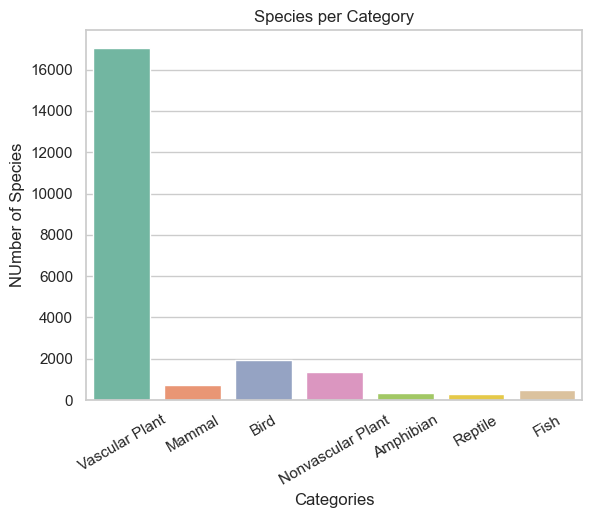

<Figure size 640x480 with 0 Axes>

In [38]:
sns.countplot(x=full_data['category'])
sns.set_style('whitegrid')
sns.color_palette('Set2')
plt.xticks(rotation=30)
plt.title('Species per Category')
plt.ylabel('NUmber of Species')
plt.xlabel('Categories')
plt.show()
plt.close()
plt.clf()

In [24]:
full_data['park_name'].value_counts()

Great Smoky Mountains     5541
Yosemite                  5541
Bryce                     5541
Yellowstone               5541
Name: park_name, dtype: int64

In [25]:
full_data['conservation_status'].value_counts()

Species of Concern    604
Endangered             60
Threatened             40
In Recovery            12
Name: conservation_status, dtype: int64

Observations Per Category.

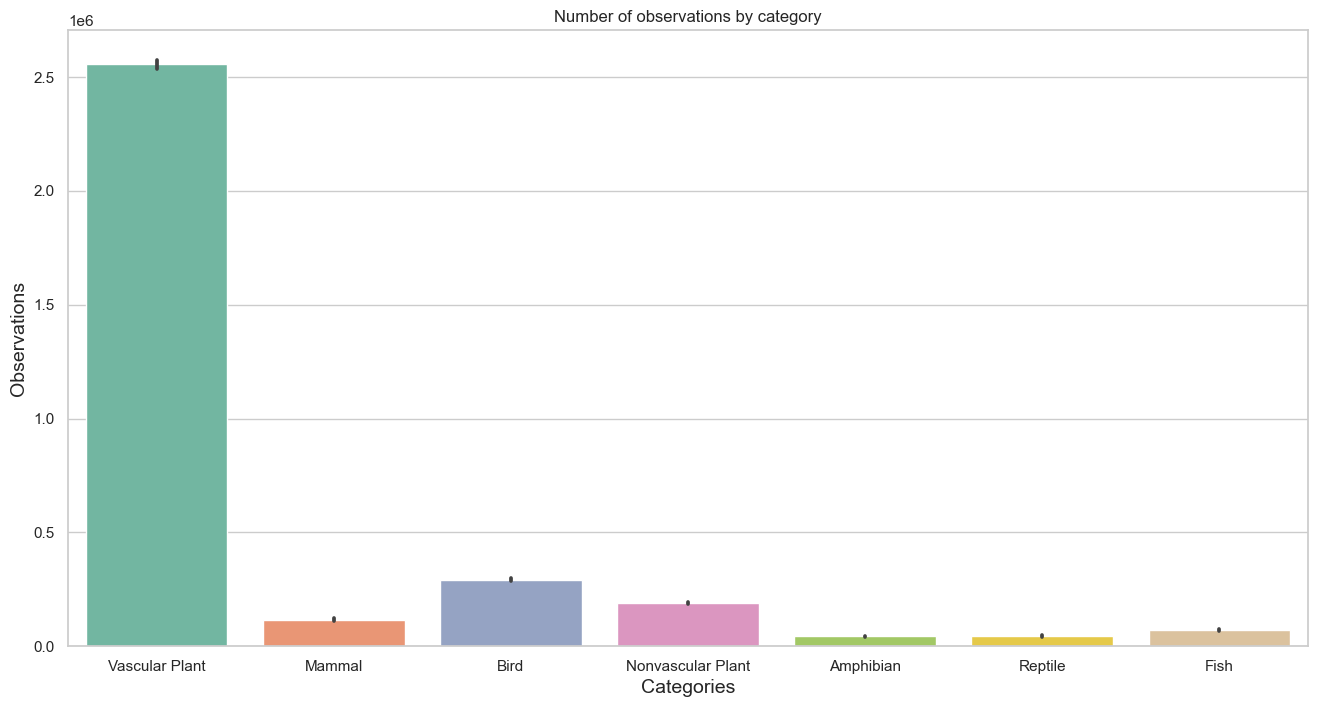

<Figure size 640x480 with 0 Axes>

In [39]:
fig = plt.figure(figsize=(16, 8))
sns.barplot(x='category', y='observations', data=full_data, estimator=np.sum)
sns.set_style('darkgrid')
plt.xlabel('Categories', fontsize=14)
plt.ylabel('Observations', fontsize=14)
plt.title('Number of observations by category')
plt.show()
plt.clf()

Observations per Category for different parks


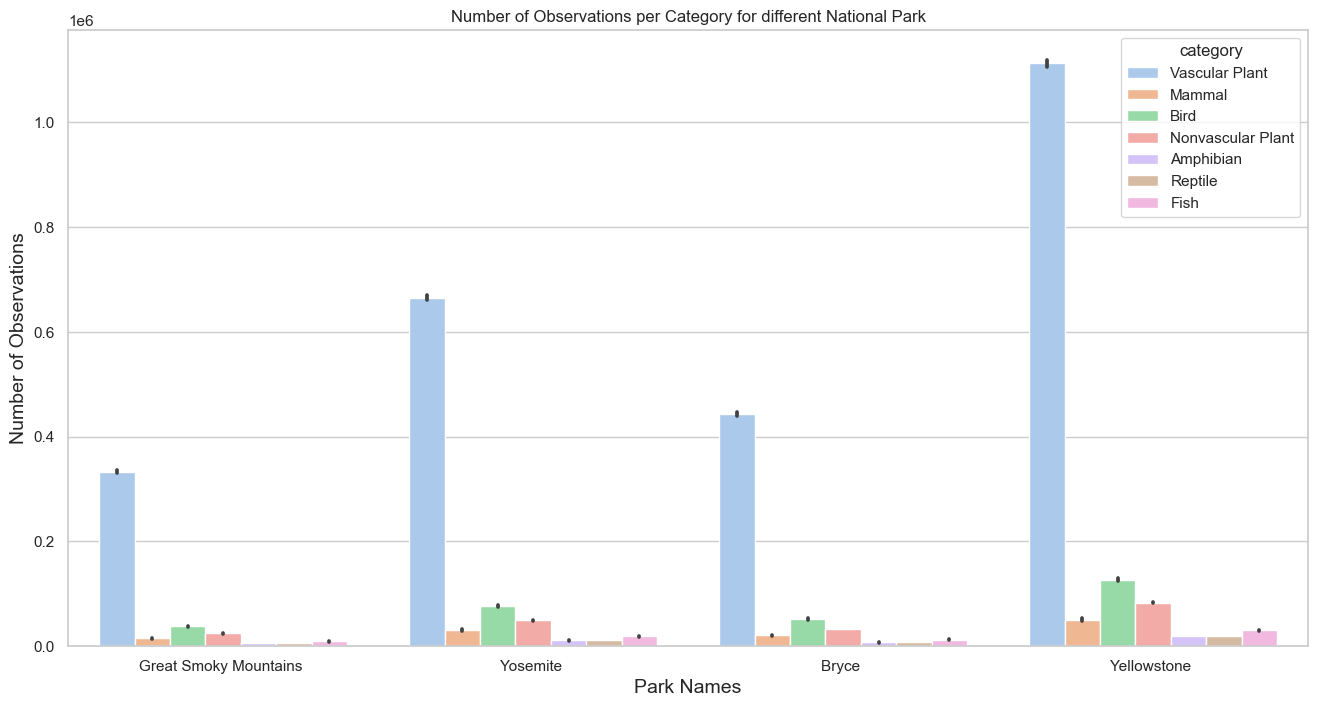

<Figure size 640x480 with 0 Axes>

In [27]:
fig = plt.figure(figsize=(16, 8))
sns.set_palette('pastel')
sns.set_style('whitegrid')
sns.set_context('notebook')
sns.barplot(x='park_name', y='observations', data=full_data, hue='category', estimator=np.sum)
plt.title('Number of Observations per Category for different National Park')
plt.ylabel('Number of Observations', fontsize=14)
plt.xlabel('Park Names', fontsize=14)
plt.show()
plt.clf()

Total number of observations for each Park by Category.


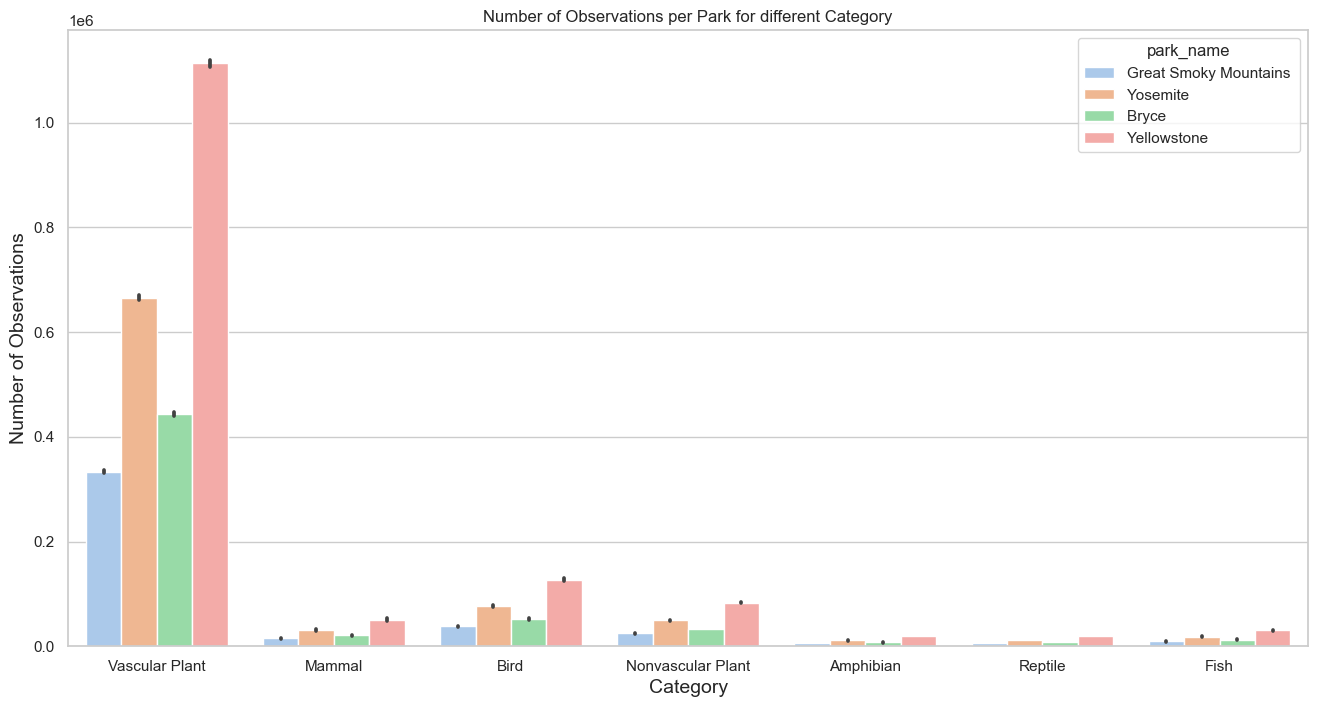

<Figure size 640x480 with 0 Axes>

In [28]:
fig = plt.figure(figsize=(16, 8))
sns.set_palette('pastel')
sns.set_style('whitegrid')
sns.set_context('notebook')
sns.barplot(x='category', y='observations', data=full_data, hue='park_name', estimator=np.sum)
plt.title('Number of Observations per Park for different Category')
plt.ylabel('Number of Observations', fontsize=14)
plt.xlabel('Category', fontsize=14)
plt.show()
plt.clf()

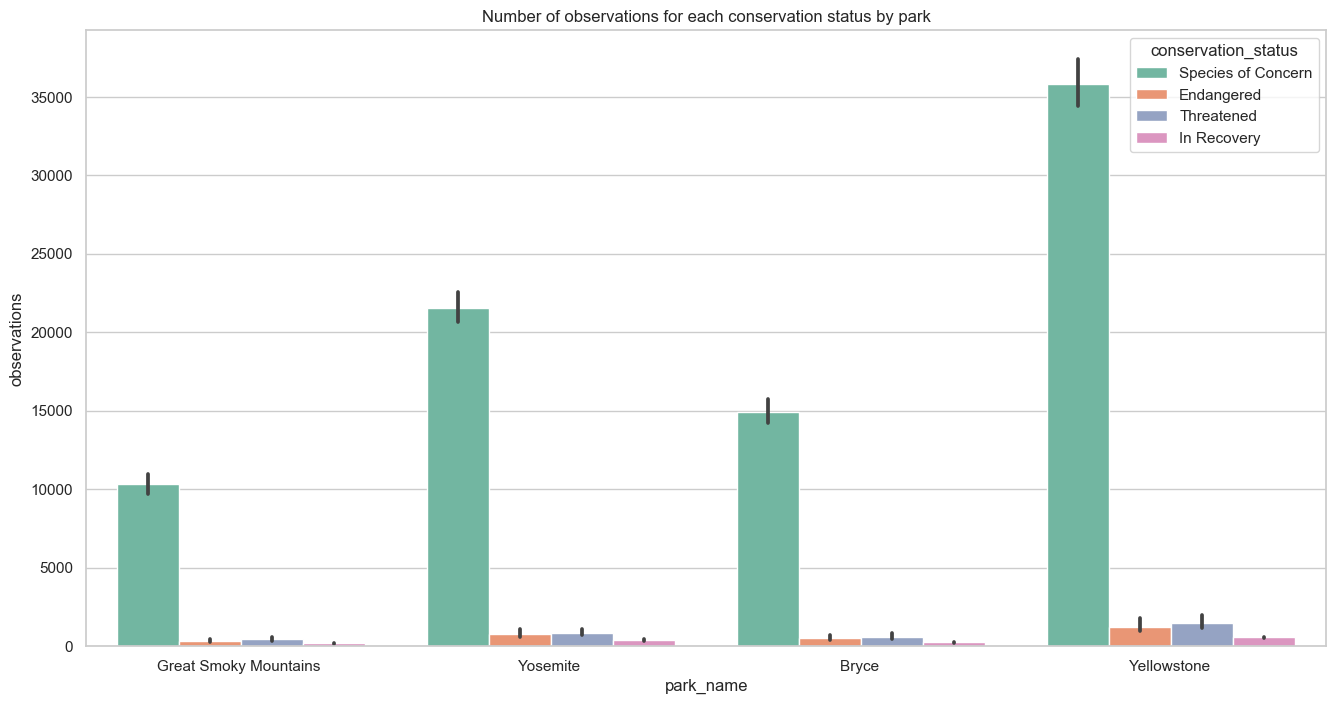

<Figure size 640x480 with 0 Axes>

In [29]:
fig = plt.figure(figsize=(16, 8))
sns.set_palette('Set2')
sns.barplot(x='park_name', y='observations', data=full_data, hue='conservation_status', estimator=np.sum)
plt.title('Number of observations for each conservation status by park')
plt.show()
plt.clf()

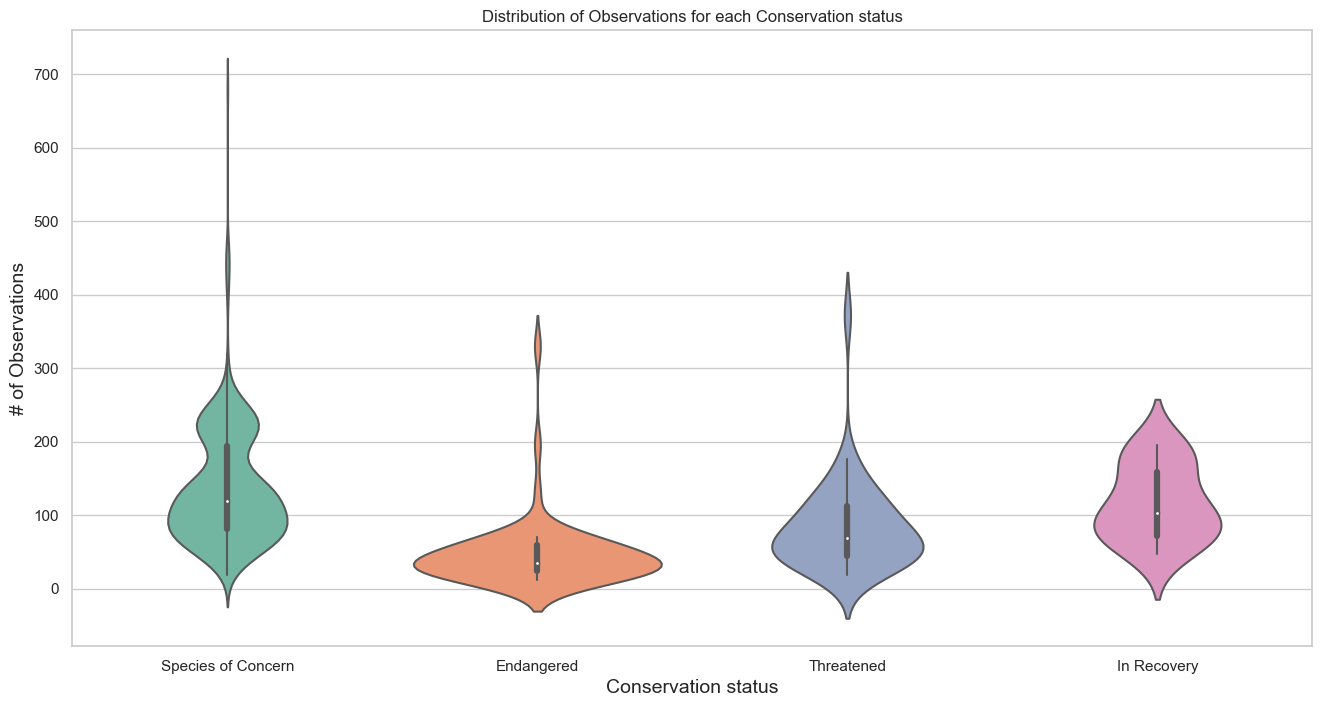

<Figure size 640x480 with 0 Axes>

In [30]:
fig = plt.figure(figsize=(16,8))
sns.violinplot(x='conservation_status', y='observations', data= full_data, estimator=np.sum)
sns.set_style('whitegrid')
plt.title("Distribution of Observations for each Conservation status")
plt.ylabel('# of Observations', fontsize=14)
plt.xlabel('Conservation status', fontsize=14)
plt.show()
plt.clf()

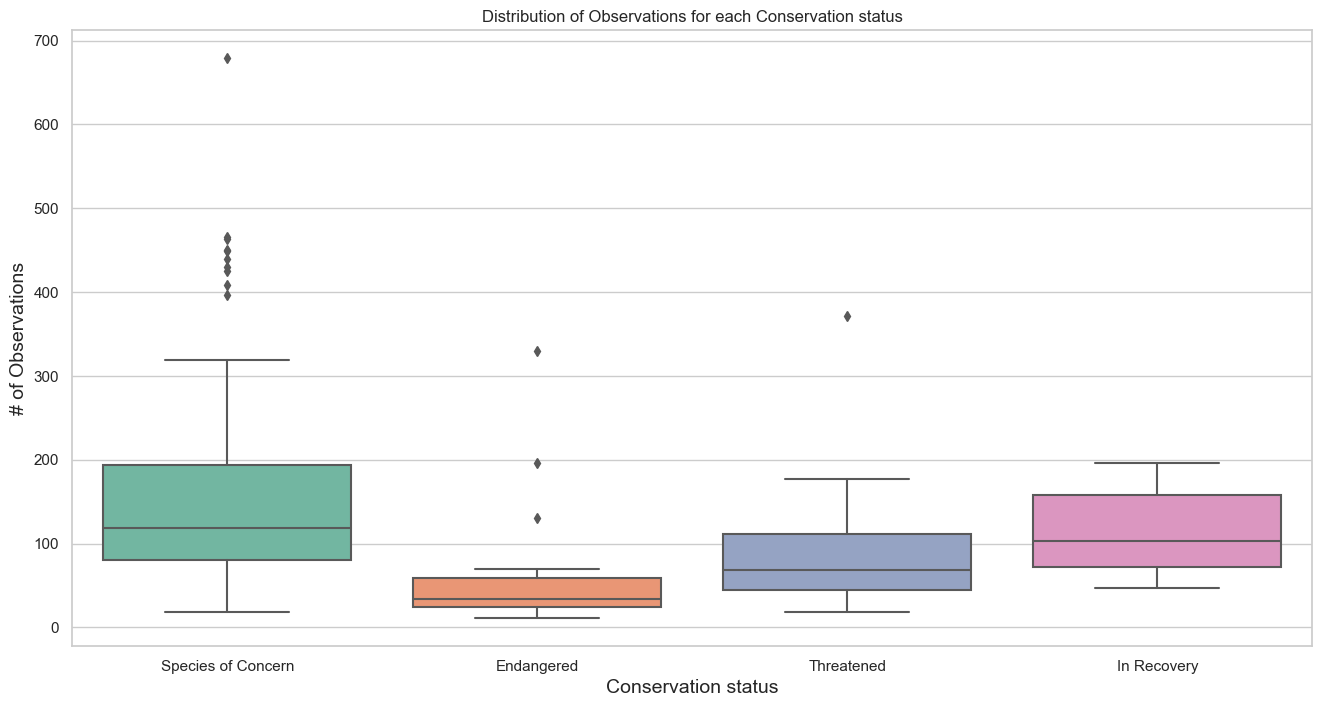

<Figure size 640x480 with 0 Axes>

In [31]:
fig = plt.figure(figsize=(16,8))
sns.boxplot(x='conservation_status', y='observations', data= full_data)
sns.set_style('whitegrid')
plt.title("Distribution of Observations for each Conservation status")
plt.ylabel('# of Observations', fontsize=14)
plt.xlabel('Conservation status', fontsize=14)
plt.show()
plt.clf()

In [32]:
full_data.head()

,scientific_name,park_name,observations,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky Mountains,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
1,Neovison vison,Great Smoky Mountains,77,Mammal,American Mink,NaN
2,Prunus subcordata,Yosemite,138,Vascular Plant,Klamath Plum,NaN
3,Abutilon theophrasti,Bryce,84,Vascular Plant,Velvetleaf,NaN
4,Githopsis specularioides,Great Smoky Mountains,85,Vascular Plant,Common Bluecup,NaN


Seperation of NaN values from the data set.

In [33]:
protected_species = full_data[full_data['conservation_status'].notna()]['category'].value_counts().reset_index()
protected_species.rename(columns={'index':'category', 'category':'protected'}, inplace=True)
protected_species.head()

,category,protected
0,Bird,300
1,Vascular Plant,184
2,Mammal,120
3,Fish,44
4,Amphibian,28


In [34]:
species_total = full_data['category'].value_counts().reset_index()
species_total.rename(columns={'index':'category', 'category':'total number'}, inplace=True)
protected_species = protected_species.merge(species_total)
protected_species.head()

,category,protected,total number
0,Bird,300,1952
1,Vascular Plant,184,17048
2,Mammal,120,704
3,Fish,44,500
4,Amphibian,28,316


In [35]:
protected_species['percentage'] = round(protected_species['protected']/protected_species['total number'] * 100, 2)
protected_species.head(10)

,category,protected,total number,percentage
0,Bird,300,1952,15.37
1,Vascular Plant,184,17048,1.08
2,Mammal,120,704,17.05
3,Fish,44,500,8.80
4,Amphibian,28,316,8.86
5,Reptile,20,312,6.41
6,Nonvascular Plant,20,1332,1.50


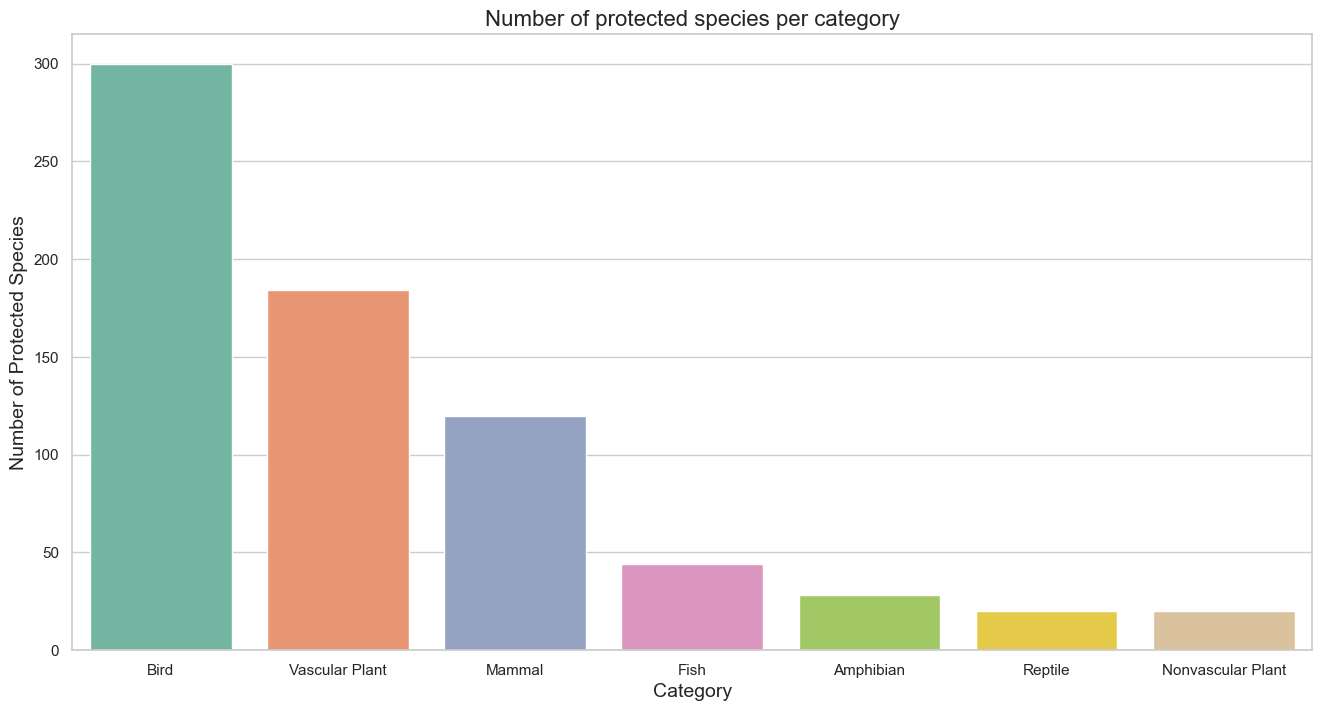

<Figure size 640x480 with 0 Axes>

In [36]:
fig = plt.figure(figsize=(16, 8))
sns.barplot(x='category', y='protected', data=protected_species)
sns.set_style('whitegrid')
sns.color_palette('Set2')
plt.xlabel('Category', fontsize=14)
plt.ylabel('Number of Protected Species', fontsize=14)
plt.title('Number of protected species per category', fontsize=16)
plt.show()
plt.clf()     

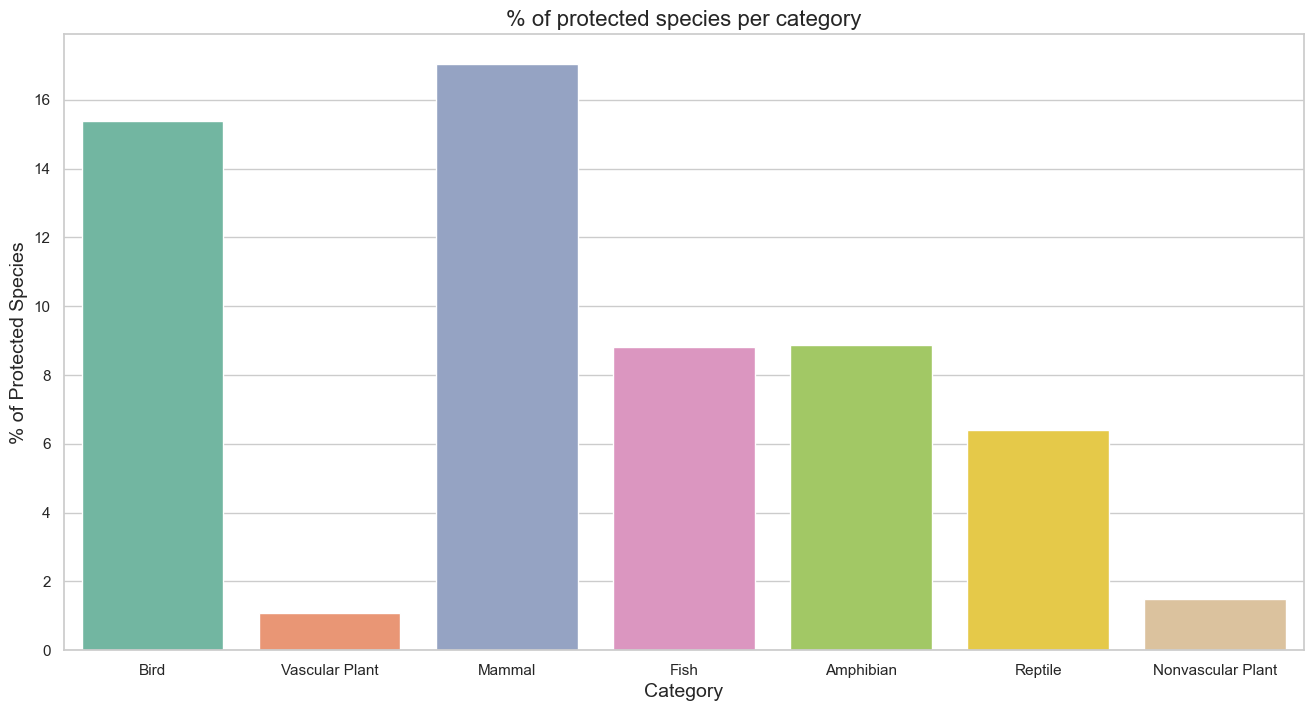

<Figure size 640x480 with 0 Axes>

In [37]:
fig = plt.figure(figsize=(16, 8))
sns.barplot(x='category', y='percentage', data=protected_species)
sns.set_style('whitegrid')
sns.color_palette('Set2')
plt.xlabel('Category', fontsize=14)
plt.ylabel('% of Protected Species', fontsize=14)
plt.title('% of protected species per category', fontsize=16)
plt.show()
plt.clf() 